In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Data Processing

In [2]:
(x_train,_), (x_test,_)= mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

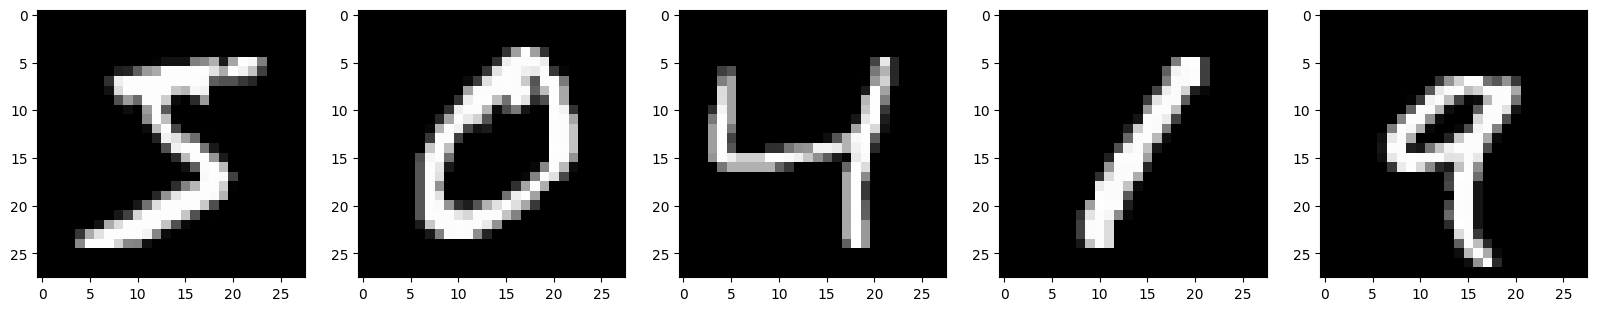

In [6]:
count = 5
plt.figure(figsize=(20,10))

for image in range(count):
    ax = plt.subplot(2, count, image + 1)
    plt.imshow(x_train[image].reshape(28, 28))
    plt.gray()
    
plt.show()

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [8]:
import numpy as np

In [9]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
x_train.shape

(60000, 784)

### Deep Encoder Modelling

### Encoder

In [11]:
input_l=Input(shape=(784,))
encoding_1=Dense(256, activation='relu')(input_l)
encoding_2=Dense(128, activation='relu')(encoding_1)

### Bottleneck

In [12]:
bottleneck=Dense(32, activation='relu')(encoding_2)

### Decoder

In [13]:
decoding_1=Dense(128, activation='relu')(bottleneck)
decoding_2=Dense(256, activation='relu')(decoding_1)

In [14]:
output_l=Dense(784, activation='sigmoid')(decoding_2)

In [15]:
autoencoder=Model(inputs=[input_l], outputs=[output_l])

In [16]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

In [17]:
from tensorflow.keras.utils import plot_model

In [18]:
plot_model(autoencoder, to_file='model_plot_autoencoder.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [20]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [21]:
plot_model(encoder, to_file='model_plot_encoder.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
encoded_input=Input(shape=(32,))

decoded_layer_1=autoencoder.layers[-3](encoded_input)
decoded_layer_2=autoencoder.layers[-2](decoded_layer_1)

decoded=autoencoder.layers[-1](decoded_layer_2)

decoder=Model(inputs=[encoded_input],outputs=[decoded])

In [23]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [24]:
plot_model(decoder, to_file='model_plot_decoder.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 9s 31ms/step - loss: 0.2200 - val_loss: 0.1445
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1312 - val_loss: 0.1188
Epoch 3/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1148 - val_loss: 0.1092
Epoch 4/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1078 - val_loss: 0.1051
Epoch 5/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1037 - val_loss: 0.1009
Epoch 6/50
235/235 [==============================] - 7s 32ms/step - loss: 0.1006 - val_loss: 0.0986
Epoch 7/50
235/235 [==============================] - 7s 32ms/step - loss: 0.0982 - val_loss: 0.0962
Epoch 8/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0962 - val_loss: 0.0942
Epoch 9/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 10/50
235/235 [==============================] - 8s 32ms/step - loss: 0.0930 - val_lo

In [27]:
encoded= encoder.predict(x_test)
decoded = decoder.predict(encoded)

313/313 [==============================] - 1s 3ms/step


In [28]:
predicted_images=autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


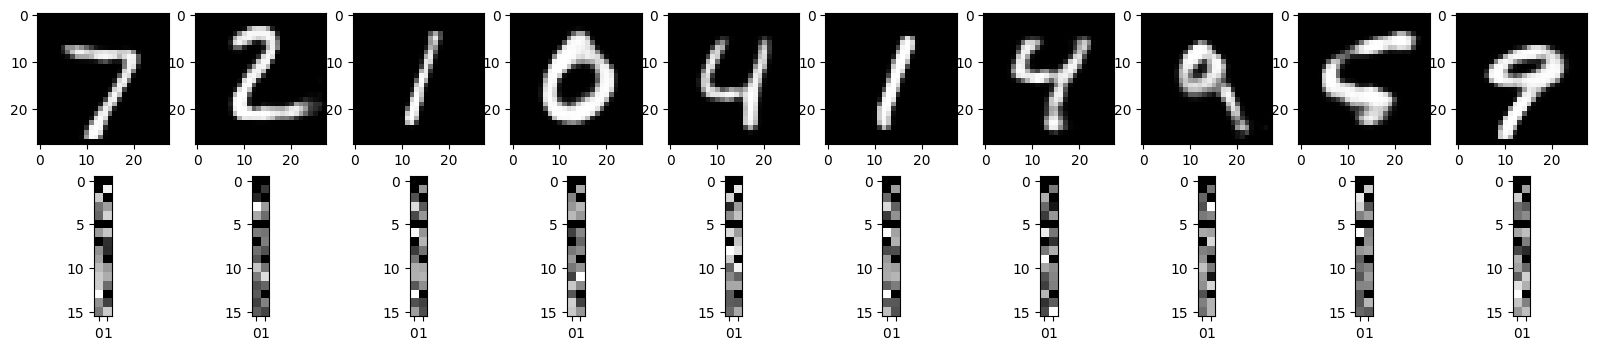

In [29]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
        
    # Encoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()
   
    
plt.show()

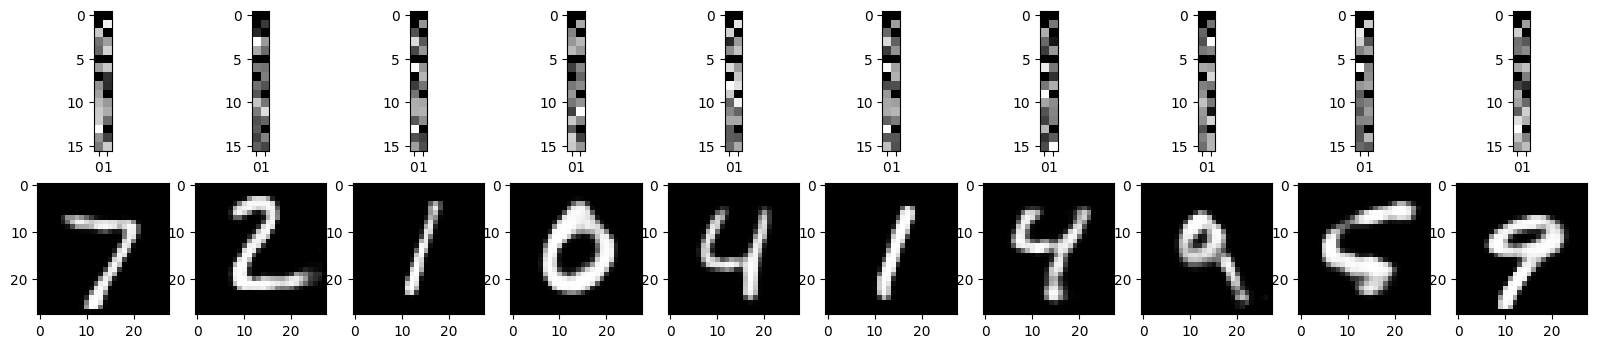

In [30]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Encoded Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()
   
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()

# Autoencoder

In [31]:
input_l=Input(shape=(784,))

bottleneck=Dense(32, activation='relu')(input_l)

output_l=Dense(784, activation='sigmoid')(bottleneck)

autoencoder=Model(inputs=[input_l],outputs=[output_l])

In [32]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [33]:
plot_model(autoencoder, to_file='model_plot_autoencoder_simple.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [35]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [36]:
plot_model(encoder, to_file='model_plot_encoder_simple.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
encoded_input=Input(shape=(32,))

decoded=autoencoder.layers[-1](encoded_input)

decoder=Model(inputs=[encoded_input],outputs=[decoded])

In [38]:
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_7 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [39]:
plot_model(decoder, to_file='model_plot_decoder_simple.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2734 - val_loss: 0.1904
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1713 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1435 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1281 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1182 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1115 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1066 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1029 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1001 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0980 - val_loss:

In [42]:
predicted_images=autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
encoded= encoder.predict(x_test)
decoded = decoder.predict(encoded)

313/313 [==============================] - 1s 2ms/step


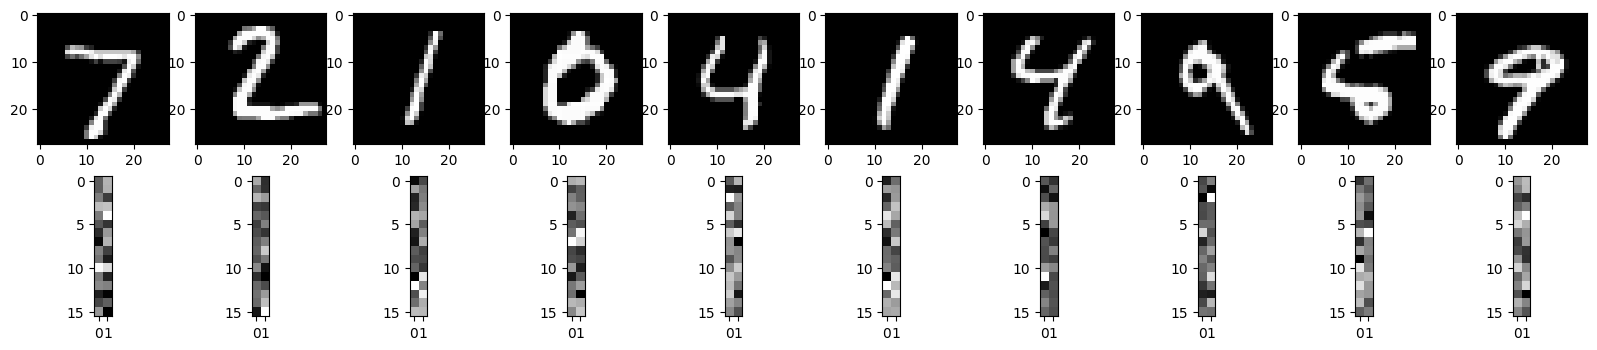

In [44]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    # Encoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()

plt.show()

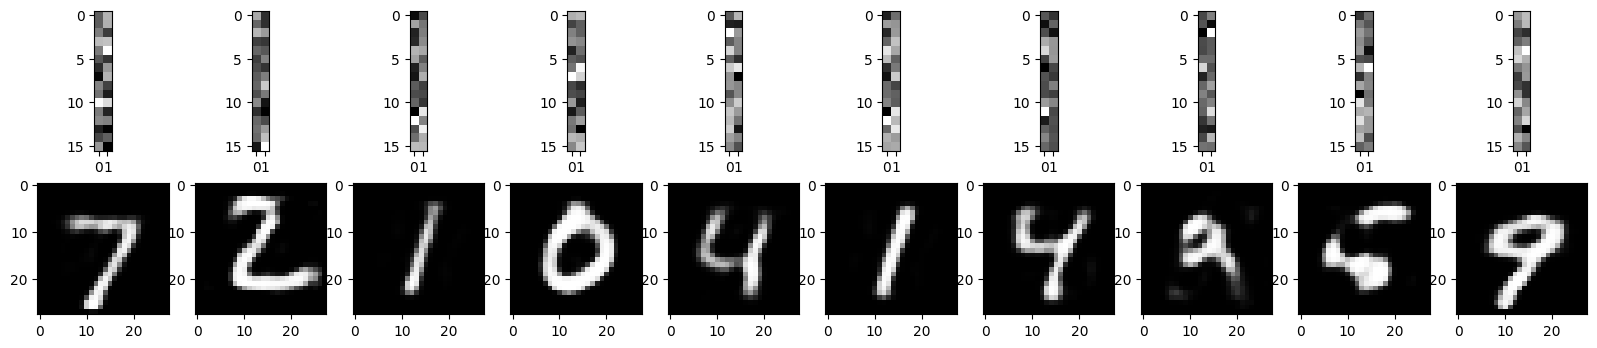

In [45]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
     # Encoded Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
plt.show()

# Sparse Autoencoder

In [46]:
from tensorflow.keras.regularizers import l1

In [47]:
input_l=Input(shape=(784,))

sp_encoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(input_l)

sp_bottleneck=Dense(32, activation='relu', activity_regularizer=l1(0.001))(sp_encoding_1)

sp_decoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(sp_bottleneck)

sp_output_l=Dense(784, activation='sigmoid')(sp_decoding_1)

sp_autoencoder=Model(inputs=[input_l],outputs=[sp_output_l])

In [48]:
sp_autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 32)                8224      
                                                                 
 dense_10 (Dense)            (None, 256)               8448      
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


In [49]:
plot_model(sp_autoencoder, to_file='model_plot_autoencoder_sparse.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
sp_encoder=Model(inputs=[input_l],outputs=[sp_bottleneck])

In [51]:
sp_encoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 32)                8224      
                                                                 
Total params: 209,184
Trainable params: 209,184
Non-trainable params: 0
_________________________________________________________________


In [52]:
plot_model(sp_encoder, to_file='model_plot_encoder_sparse.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
sp_encoded_input=Input(shape=(32,))

sp_decoded_layer_2=sp_autoencoder.layers[-2](sp_encoded_input)

sp_decoded=sp_autoencoder.layers[-1](sp_decoded_layer_2)

sp_decoder=Model(inputs=[sp_encoded_input],outputs=[sp_decoded])

In [55]:
sp_decoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_10 (Dense)            (None, 256)               8448      
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 209,936
Trainable params: 209,936
Non-trainable params: 0
_________________________________________________________________


In [56]:
plot_model(sp_decoder, to_file='model_plot_decoder_sparse.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
sp_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [58]:
sp_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 8s 29ms/step - loss: 0.3755 - val_loss: 0.2743
Epoch 2/50
235/235 [==============================] - 7s 28ms/step - loss: 0.2476 - val_loss: 0.2267
Epoch 3/50
235/235 [==============================] - 6s 28ms/step - loss: 0.2151 - val_loss: 0.2031
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1962 - val_loss: 0.1891
Epoch 5/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1850 - val_loss: 0.1794
Epoch 6/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1770 - val_loss: 0.1727
Epoch 7/50
235/235 [==============================] - 7s 31ms/step - loss: 0.1713 - val_loss: 0.1677
Epoch 8/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1665 - val_loss: 0.1632
Epoch 9/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1623 - val_loss: 0.1591
Epoch 10/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1586 - val_lo

In [59]:
sp_predicted_images=sp_autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [60]:
sp_encoded= sp_encoder.predict(x_test)
sp_decoded = sp_decoder.predict(sp_encoded)

313/313 [==============================] - 1s 3ms/step


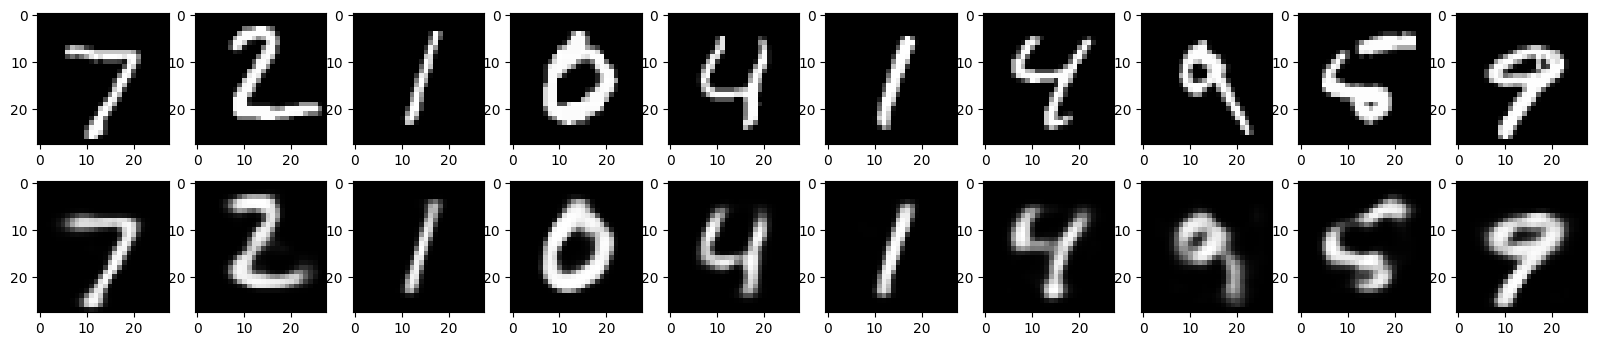

In [61]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sp_predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()

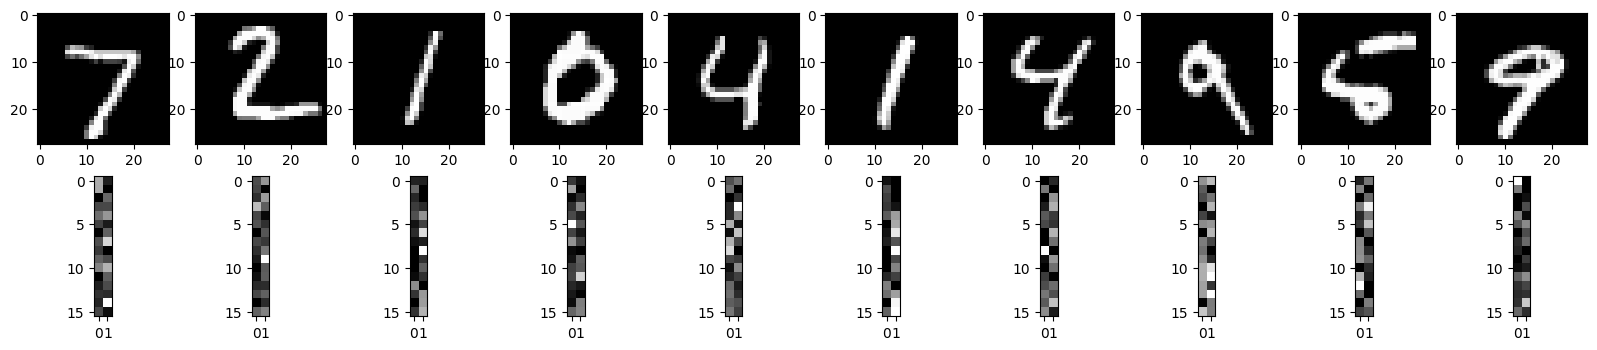

In [62]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Original imaged
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()     
    
    
    # Encoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sp_encoded[i].reshape(16, 2))
    plt.gray()
    
plt.show()

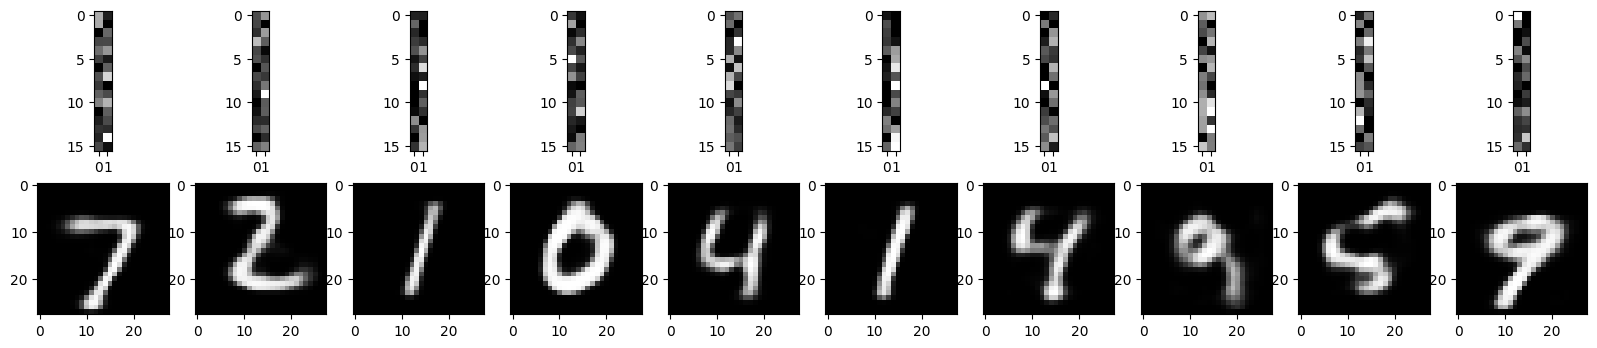

In [63]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Original imaged
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sp_encoded[i].reshape(16, 2))
    plt.gray()     
    
    
    # Encoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sp_decoded[i].reshape(28, 28))
    plt.gray()
    
plt.show()

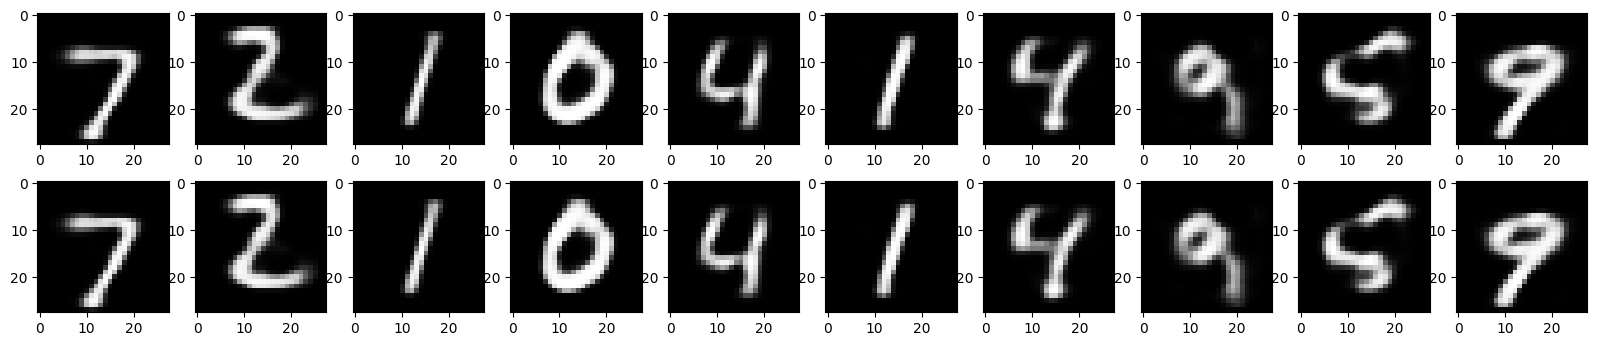

In [64]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Original imaged
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sp_decoded[i].reshape(28, 28))
    plt.gray()     
    
    
    # Encoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sp_predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()